In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
# Load dataset
df = pd.read_csv('Students_Performance_data_set.csv') 

In [3]:
df.sample(10)

,University Admission year,Gender,Age,H.S.C passing year,Program,Current Semester,Do you have meritorious scholarship ?,Do you use University transportation?,How many hour do you study daily?,How many times do you seat for study in a day?,...,What is your relationship status?,Are you engaged with any co-curriculum activities?,With whom you are living with?,Do you have any health issues?,What was your previous SGPA?,Do you have any physical disabilities?,What is your current CGPA?,How many Credit did you have completed?,What is your monthly family income?,target
542,2022,Male,20,2020,BCSE,2nd,Yes,Yes,4/5,1 or 2,...,Single,Yes,Family,Yes,3.45,No,0,11,20000,NaN
846,2021,Male,21,2020,BCSE,8th,No,No,4 hours,2 times,...,Single,Yes,Bachelor,No,2.29,No,3.56,100,89000,NaN
872,2022,Male,20,2021,BCSE,6th,No,No,3 hours,3 times,...,In a relationship,No,Bachelor,No,2.46,No,3.55,89,120000,NaN
129,2018,Female,23,2016,BCSE,14,No,Yes,3/4,2 time,...,Single,No,Bachelor,Yes,2.98,Yes,2.96,118,20000,NaN
285,2021,Female,20,2020,BCSE,3rd,Yes,Yes,2-3 hour,2-3 times,...,Single,No,Bachelor,No,3.19,Yes,2.73,24,40000,NaN
510,2021,Male,21,2019,BCSE,2nd,Yes,No,3h,2,...,Single,No,Bachelor,No,"1,42",No,1.42,5,50000 BDT,NaN
565,2020,Male,22,2019,BCSE,8,Yes,Yes,3,3,...,Single,No,Family,No,3.15,No,3.71,84,5000,NaN
561,2019,Male,22,2018,BCSE,Summer 2022 (8th),Yes,Yes,4,2,...,Single,No,Family,No,3.78,No,3.88,93,30000,NaN
618,2018,Male,25,2016,BCSE,13,Yes,Yes,2 hours,2 times,...,Single,No,Family,No,2.4,No,2.41,86,"50,000/=",NaN
350,2021,Female,21,2020,BCSE,4th,No,Yes,6hour,1 time day,...,Single,Yes,Family,No,3.39,No,2.8,20,40000,NaN


In [4]:
# Size of data frame
df.shape

(1194, 32)

In [5]:
# check missing values
df.isnull().sum()

University Admission year                                                        0
Gender                                                                           0
Age                                                                              1
H.S.C passing year                                                               0
Program                                                                          0
Current Semester                                                                 0
Do you have meritorious scholarship ?                                            0
Do you use University transportation?                                            5
How many hour do you study daily?                                                0
How many times do you seat for study in a day?                                   1
What is your preferable learning mode?                                           0
Do you use smart phone?                                                          0
Do y

In [6]:
# check missing values percentage
df.isnull().mean()*100

University Admission year                                                       0.000000
Gender                                                                          0.000000
Age                                                                             0.083752
H.S.C passing year                                                              0.000000
Program                                                                         0.000000
Current Semester                                                                0.000000
Do you have meritorious scholarship ?                                           0.000000
Do you use University transportation?                                           0.418760
How many hour do you study daily?                                               0.000000
How many times do you seat for study in a day?                                  0.083752
What is your preferable learning mode?                                          0.000000
Do you use smart phon

In [7]:
# check duplicated values
df.duplicated().sum()

0

In [8]:
# DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 32 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   University Admission year                                                   1194 non-null   object 
 1   Gender                                                                      1194 non-null   object 
 2   Age                                                                         1193 non-null   object 
 3   H.S.C passing year                                                          1194 non-null   object 
 4   Program                                                                     1194 non-null   object 
 5   Current Semester                                                            1194 non-null   object 
 6   Do you have meritorious scholarship ?           

In [9]:
print(df['Gender'].value_counts())

Male      672
Female    522
Name: Gender, dtype: int64


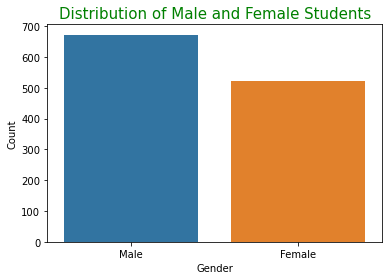

In [10]:
# bar plot for gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Male and Female Students',fontsize=15,color='green')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

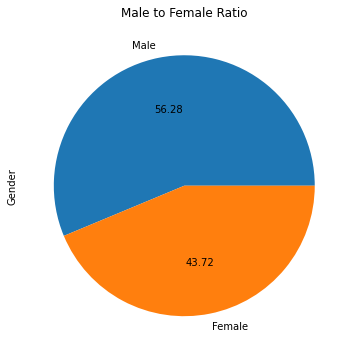

In [11]:
plt.figure(figsize=(12, 6))
gender_counts= df['Gender'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Male to Female Ratio')
plt.show()

In [12]:
df.head(5)

,University Admission year,Gender,Age,H.S.C passing year,Program,Current Semester,Do you have meritorious scholarship ?,Do you use University transportation?,How many hour do you study daily?,How many times do you seat for study in a day?,...,What is your relationship status?,Are you engaged with any co-curriculum activities?,With whom you are living with?,Do you have any health issues?,What was your previous SGPA?,Do you have any physical disabilities?,What is your current CGPA?,How many Credit did you have completed?,What is your monthly family income?,target
0,2018,Male,24,2016,BCSE,12,Yes,No,3,2,...,Single,Yes,Bachelor,No,NaN,No,NaN,NaN,25000,NaN
1,2021,Male,22,2020,BCSE,4,Yes,Yes,3,2,...,Single,Yes,Family,No,NaN,No,NaN,NaN,100000bdt,NaN
2,2020,Female,21,2019,BCSE,5,No,No,3,3,...,Single,No,Bachelor,No,NaN,No,NaN,NaN,50000BDT,NaN
3,2021,Male,20,2020,BCSE,4th,Yes,No,1,3-4,...,Single,No,Bachelor,Yes,NaN,No,NaN,NaN,Actually my family didn’t tell me,NaN
4,2021,Male,22,2019,BCSE,4th-summer 22,Yes,No,3/4 hours,1,...,In a relationship,No,Bachelor,Yes,NaN,No,NaN,NaN,50000,NaN


In [13]:
# Check initial shape of dataframe and the number of null values per column
initial_shape = df.shape
initial_null_values = df.isnull().sum()

In [14]:
# Dropping Columns with excessive missing values
threshold = len(df) * 0.8
columns_to_drop = df.columns[df.isnull().sum() > threshold]
df_dropped = df.drop(columns=columns_to_drop)

In [15]:
for column in df_dropped.columns:
    if df_dropped[column].dtype == 'object':
        df_dropped[column].fillna(df_dropped[column].mode()[0], inplace=True)
    else:  # numerical 
        df_dropped[column].fillna(df_dropped[column].median(), inplace=True)

In [16]:
# Checking shape and null values after dropping columns and filling missing values
post_drop_shape = df_dropped.shape
post_drop_null_values = df_dropped.isnull().sum()

In [17]:
post_drop_null_values

University Admission year                                                     0
Gender                                                                        0
Age                                                                           0
H.S.C passing year                                                            0
Program                                                                       0
Current Semester                                                              0
Do you have meritorious scholarship ?                                         0
Do you use University transportation?                                         0
How many hour do you study daily?                                             0
How many times do you seat for study in a day?                                0
What is your preferable learning mode?                                        0
Do you use smart phone?                                                       0
Do you have personal Computer?          

In [18]:
# Encoding Categorical Variables
categorical_columns = df_dropped.select_dtypes(include=['object']).columns
df_encoded = df_dropped.copy()
for column in categorical_columns:
    df_encoded[column] = pd.Categorical(df_encoded[column]).codes

In [19]:
df_encoded

,University Admission year,Gender,Age,H.S.C passing year,Program,Current Semester,Do you have meritorious scholarship ?,Do you use University transportation?,How many hour do you study daily?,How many times do you seat for study in a day?,...,What is you interested area?,What is your relationship status?,Are you engaged with any co-curriculum activities?,With whom you are living with?,Do you have any health issues?,What was your previous SGPA?,Do you have any physical disabilities?,What is your current CGPA?,How many Credit did you have completed?,What is your monthly family income?
0,8,1,12,10,0,15,1,0,87,40,...,8,3,1,0,1,261,0,2,16,100
1,13,1,8,18,0,64,1,1,87,40,...,12,3,1,1,1,261,0,2,16,18
2,10,0,6,16,0,74,0,0,87,80,...,50,3,0,0,1,261,0,2,16,183
3,13,1,3,18,0,68,1,0,13,88,...,0,3,0,0,2,261,0,2,16,255
4,13,1,8,16,0,73,1,0,114,8,...,50,1,0,0,2,261,0,2,16,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,13,0,3,18,0,93,0,1,15,53,...,9,1,1,0,1,135,0,176,5,68
1190,15,1,10,18,0,93,1,1,126,112,...,50,3,1,0,1,120,0,25,71,85
1191,13,1,8,18,0,103,0,1,94,86,...,14,2,1,1,1,34,0,72,37,85
1192,9,0,14,14,0,11,0,1,155,86,...,50,3,0,0,1,21,0,46,66,91


In [20]:
# Checking the final shape and null values after encoding
final_shape = df_encoded.shape
final_null_values = df_encoded.isnull().sum()

{
    "initial_shape": initial_shape,
    "initial_null_values": initial_null_values.to_dict(),
    "post_drop_shape": post_drop_shape,
    "post_drop_null_values": post_drop_null_values.to_dict(),
    "final_shape": final_shape,
    "final_null_values": final_null_values.to_dict()
}

{'initial_shape': (1194, 32),
 'initial_null_values': {'University Admission year': 0,
  'Gender': 0,
  'Age': 1,
  'H.S.C passing year': 0,
  'Program': 0,
  'Current Semester': 0,
  'Do you have meritorious scholarship ?': 0,
  'Do you use University transportation?': 5,
  'How many hour do you study daily?': 0,
  'How many times do you seat for study in a day?': 1,
  'What is your preferable learning mode?': 0,
  'Do you use smart phone?': 0,
  'Do you have personal Computer?': 0,
  'How many hour do you spent daily in social media?': 9,
  'Status of your English language proficiency': 0,
  'Average attendance on class': 0,
  'Did you ever fall in probation?': 0,
  'Did you ever got suspension?': 0,
  'Do you attend in teacher consultancy for any kind of academical problems? ': 0,
  'What are the skills do you have ?': 1,
  'How many hour do you spent daily on your skill development?': 9,
  'What is you interested area?': 7,
  'What is your relationship status?': 0,
  'Are you engag

In [21]:
df.head(5)

,University Admission year,Gender,Age,H.S.C passing year,Program,Current Semester,Do you have meritorious scholarship ?,Do you use University transportation?,How many hour do you study daily?,How many times do you seat for study in a day?,...,What is your relationship status?,Are you engaged with any co-curriculum activities?,With whom you are living with?,Do you have any health issues?,What was your previous SGPA?,Do you have any physical disabilities?,What is your current CGPA?,How many Credit did you have completed?,What is your monthly family income?,target
0,2018,Male,24,2016,BCSE,12,Yes,No,3,2,...,Single,Yes,Bachelor,No,NaN,No,NaN,NaN,25000,NaN
1,2021,Male,22,2020,BCSE,4,Yes,Yes,3,2,...,Single,Yes,Family,No,NaN,No,NaN,NaN,100000bdt,NaN
2,2020,Female,21,2019,BCSE,5,No,No,3,3,...,Single,No,Bachelor,No,NaN,No,NaN,NaN,50000BDT,NaN
3,2021,Male,20,2020,BCSE,4th,Yes,No,1,3-4,...,Single,No,Bachelor,Yes,NaN,No,NaN,NaN,Actually my family didn’t tell me,NaN
4,2021,Male,22,2019,BCSE,4th-summer 22,Yes,No,3/4 hours,1,...,In a relationship,No,Bachelor,Yes,NaN,No,NaN,NaN,50000,NaN


In [22]:
# updated dataframe after preprocessing
df_encoded.head()

,University Admission year,Gender,Age,H.S.C passing year,Program,Current Semester,Do you have meritorious scholarship ?,Do you use University transportation?,How many hour do you study daily?,How many times do you seat for study in a day?,...,What is you interested area?,What is your relationship status?,Are you engaged with any co-curriculum activities?,With whom you are living with?,Do you have any health issues?,What was your previous SGPA?,Do you have any physical disabilities?,What is your current CGPA?,How many Credit did you have completed?,What is your monthly family income?
0,8,1,12,10,0,15,1,0,87,40,...,8,3,1,0,1,261,0,2,16,100
1,13,1,8,18,0,64,1,1,87,40,...,12,3,1,1,1,261,0,2,16,18
2,10,0,6,16,0,74,0,0,87,80,...,50,3,0,0,1,261,0,2,16,183
3,13,1,3,18,0,68,1,0,13,88,...,0,3,0,0,2,261,0,2,16,255
4,13,1,8,16,0,73,1,0,114,8,...,50,1,0,0,2,261,0,2,16,175


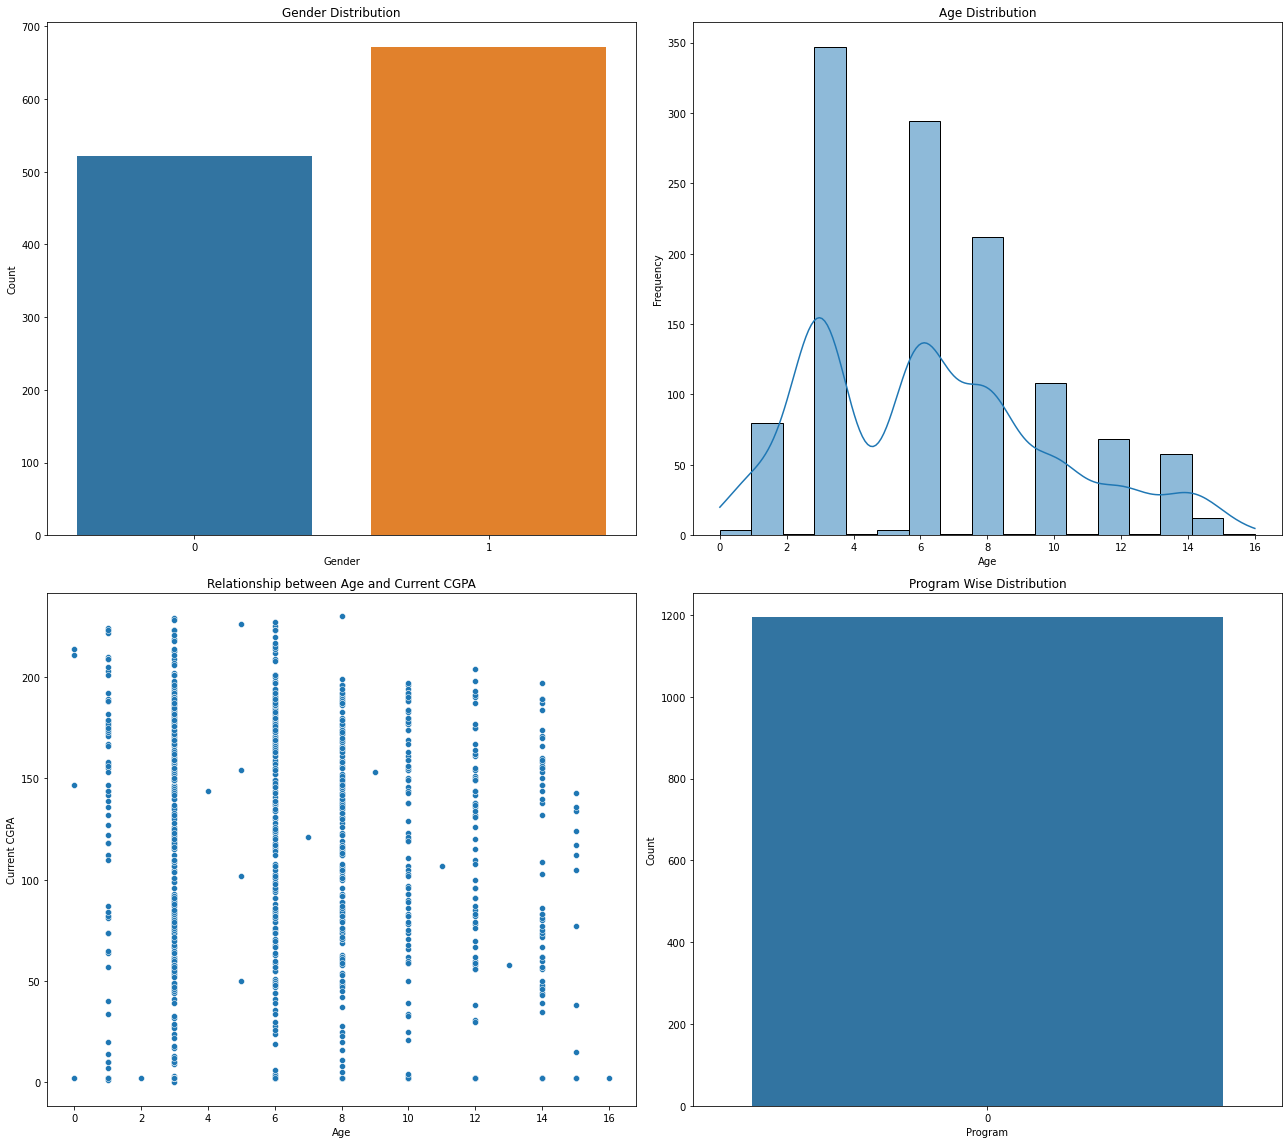

In [23]:
# Visualization layout
plt.figure(figsize=(18, 16))

# Gender distribution
plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=df_encoded)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Age distribution
plt.subplot(2, 2, 2)
sns.histplot(df_encoded['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Relationship between Age and CGPA
plt.subplot(2, 2, 3)
sns.scatterplot(x='Age', y='What is your current CGPA?', data=df_encoded)
plt.title('Relationship between Age and Current CGPA')
plt.xlabel('Age')
plt.ylabel('Current CGPA')

# Program wise distribution
plt.subplot(2, 2, 4)
sns.countplot(x='Program', data=df_encoded)
plt.title('Program Wise Distribution')
plt.xlabel('Program')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



In [24]:
# Create the target column based on conditions
def classify_student(row):
    if (row['How many hour do you study daily?'] >= 3 and
        row['What is your current CGPA?'] >= 3.75 and
        row['What was your previous SGPA?'] >= 3.20 and
        row['Average attendance on class'] >= 90 and
        row['How many hour do you spent daily in social media?'] <= 3):
        return 'Excellent'
    elif (row['How many hour do you study daily?'] >= 2 and
          row['What is your current CGPA?'] >= 3.20 and
          row['What was your previous SGPA?'] >= 2.90 and
          row['Average attendance on class'] >= 85 and
          row['How many hour do you spent daily in social media?'] <= 4):
        return 'Good'
    elif (row['How many hour do you study daily?'] >= 1 and
          row['What is your current CGPA?'] >= 2.80 and
          row['What was your previous SGPA?'] >= 2.50 and
          row['Average attendance on class'] >= 75 and
          row['How many hour do you spent daily in social media?'] <= 5):
        return 'Average'
    else:
        return 'Poor'

In [25]:
df_encoded['target'] = df_encoded.apply(classify_student, axis=1)

# Normalize age using Min-Max scaling 
df_encoded['Age_norm'] = (df_encoded['Age'] - df_encoded['Age'].min()) / (df_encoded['Age'].max() - df_encoded['Age'].min())

In [26]:

# Create feature combining study hours and CGPA as simple interaction
df_encoded['Study_CGPA_Interaction'] = df_encoded['How many hour do you study daily?'] * df_encoded['What is your current CGPA?']

In [27]:
X = df_encoded.drop('target', axis=1)  # Features
y = df_encoded['target']  # Target 

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# data 60% training, 20% validation, 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [30]:
# Returning shapes of the splits as a verification step
{
    "X_train_shape": X_train.shape,
    "X_val_shape": X_val.shape,
    "X_test_shape": X_test.shape,
    "y_train_shape": y_train.shape,
    "y_val_shape": y_val.shape,
    "y_test_shape": y_test.shape
}

{'X_train_shape': (716, 33),
 'X_val_shape': (239, 33),
 'X_test_shape': (239, 33),
 'y_train_shape': (716,),
 'y_val_shape': (239,),
 'y_test_shape': (239,)}

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression

In [39]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions on validation data
y_pred_lr = log_reg.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_lr)
print("Accuracy of Logistic Regression model:", accuracy)

Accuracy of Logistic Regression model: 0.99581589958159


# SVM Classifier

In [38]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Predictions on validation data
y_pred_svm = svm_classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_svm)
print("Accuracy of SVM classifier:", accuracy)

Accuracy of SVM classifier: 0.99581589958159


# Decision Tree Classifier

In [37]:
dc= DecisionTreeClassifier()
dc.fit(X_train, y_train)

# Predictions on validation data
ypred = dc.predict(X_val)
accuracy = accuracy_score(y_val, ypred)
print("Accuracy of Decision Tree classifier:", accuracy)

Accuracy of Decision Tree classifier: 1.0


Conclusion:
The primary objective was to build classification models to categorize students based on various academic and lifestyle features. The target variable was engineered based on specific criteria relating to study hours, CGPA, and other factors, leading to a severe class imbalance with the vast majority of students classified as 'Poor'.

Here are the key findings:

Class Imbalance:

The models achieved an accuracy of approximately 99.58% across Logistic Regression, Decision Tree, Random Forest, and SVM. This high accuracy is largely due to the class imbalance, where nearly all instances in the dataset belong to the 'Poor' class.
Model Performance:

Due to the severel class imbalance, the accuracy metrix is not fully indicative of the models' performance. The models likely predict the majority class for nearly all instances, resulting in high accuracy but potentially poor generalization to more balanced data or in practice.

Future Work:
Addressing Class Imbalance: